# approach-ml-problem

Use the "Run" button to execute the code.

In [1]:
print('Hello World')

Hello World


In [2]:
# !pip install jovian scikit-learn opendatasets --quiet

In [2]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import jovian

In [3]:
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.facecolor']='#00000000'

In [4]:
import opendatasets as od

In [6]:
# od.download('https://www.kaggle.com/c/rossmann-store-sales')

In [5]:
ross_df = pd.read_csv('./rossmann-store-sales/train.csv', low_memory=False)

In [6]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [8]:
store_df = pd.read_csv('./rossmann-store-sales/store.csv', low_memory=False)

In [9]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
merged_df=pd.merge(store_df,ross_df,on='Store',how='left')

In [11]:
merged_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


In [12]:
test_df=pd.read_csv('./rossmann-store-sales/test.csv',low_memory=False)
merged_test_df=pd.merge(test_df,store_df,on='Store',how='left')
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [14]:
merged_df.shape

(1017209, 18)

In [15]:
merge_description=merged_df.describe()
merge_description=merge_description.map(lambda x:'{:.2f}'.format(x))

In [16]:
merge_description

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1014567.00,693861.00,693861.00,1017209.00,509178.00,509178.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,5430.09,7.22,2008.69,0.50,23.27,2011.75,4.00,5773.82,633.15,0.83,0.38,0.18
std,321.91,7715.32,3.21,5.99,0.50,14.10,1.66,2.00,3849.93,464.41,0.38,0.49,0.38
min,1.00,20.00,1.00,1900.00,0.00,1.00,2009.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,710.00,4.00,2006.00,0.00,13.00,2011.00,2.00,3727.00,405.00,1.00,0.00,0.00
50%,558.00,2330.00,8.00,2010.00,1.00,22.00,2012.00,4.00,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6890.00,10.00,2013.00,1.00,37.00,2013.00,6.00,7856.00,837.00,1.00,1.00,0.00
max,1115.00,75860.00,12.00,2015.00,1.00,50.00,2015.00,7.00,41551.00,7388.00,1.00,1.00,1.00


In [17]:
merged_df.duplicated().sum()

np.int64(0)

In [18]:
# jovian.commit()

In [19]:
merged_df['Date']=pd.to_datetime(merged_df.Date)

In [20]:
merged_test_df['Date']=pd.to_datetime(merged_test_df.Date)

In [21]:
merged_df.Date.min(),merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [22]:
merged_test_df.Date.min(),merged_test_df.Date.max()


(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

<Axes: xlabel='Sales', ylabel='Count'>

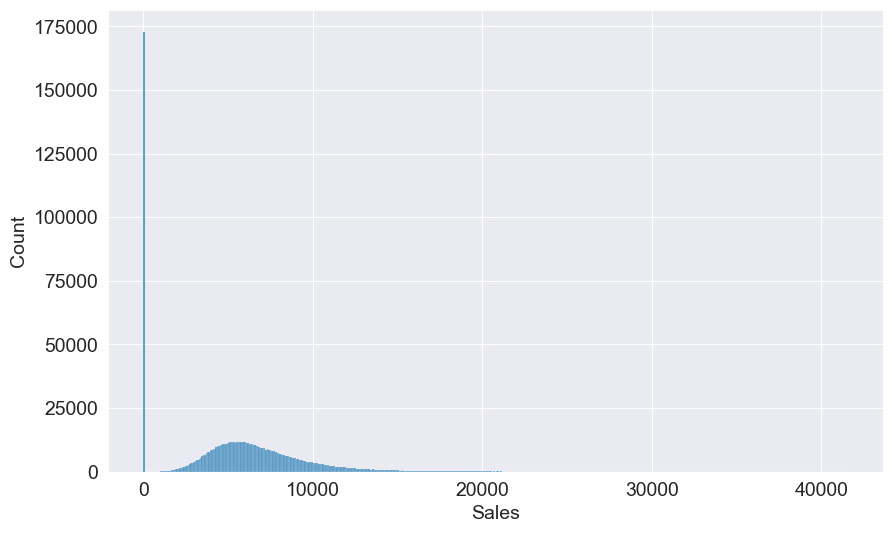

In [23]:
sns.histplot(data=merged_df,x='Sales')

In [24]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [25]:
merged_df=merged_df[merged_df.Open==1].copy()

In [26]:
merged_df.Open.value_counts()

Open
1    844392
Name: count, dtype: int64

<Axes: xlabel='Sales', ylabel='Count'>

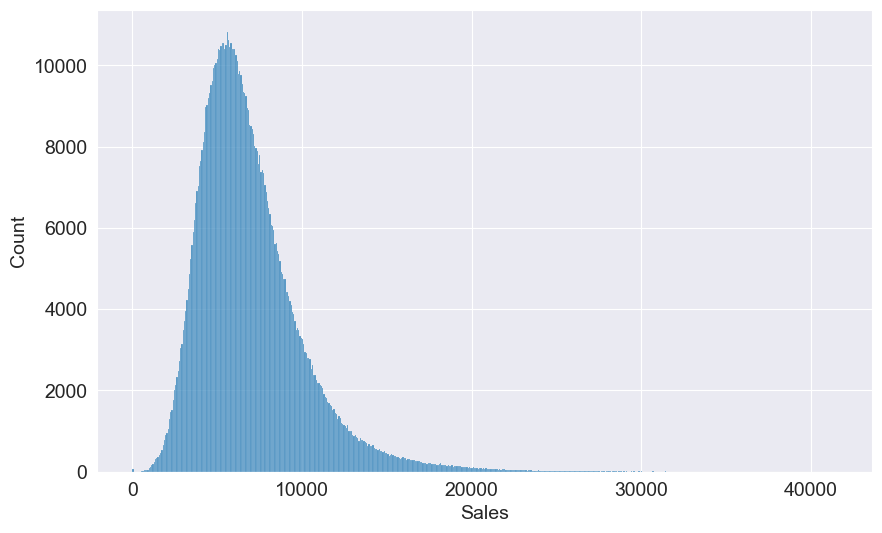

In [27]:
sns.histplot(data=merged_df,x='Sales')

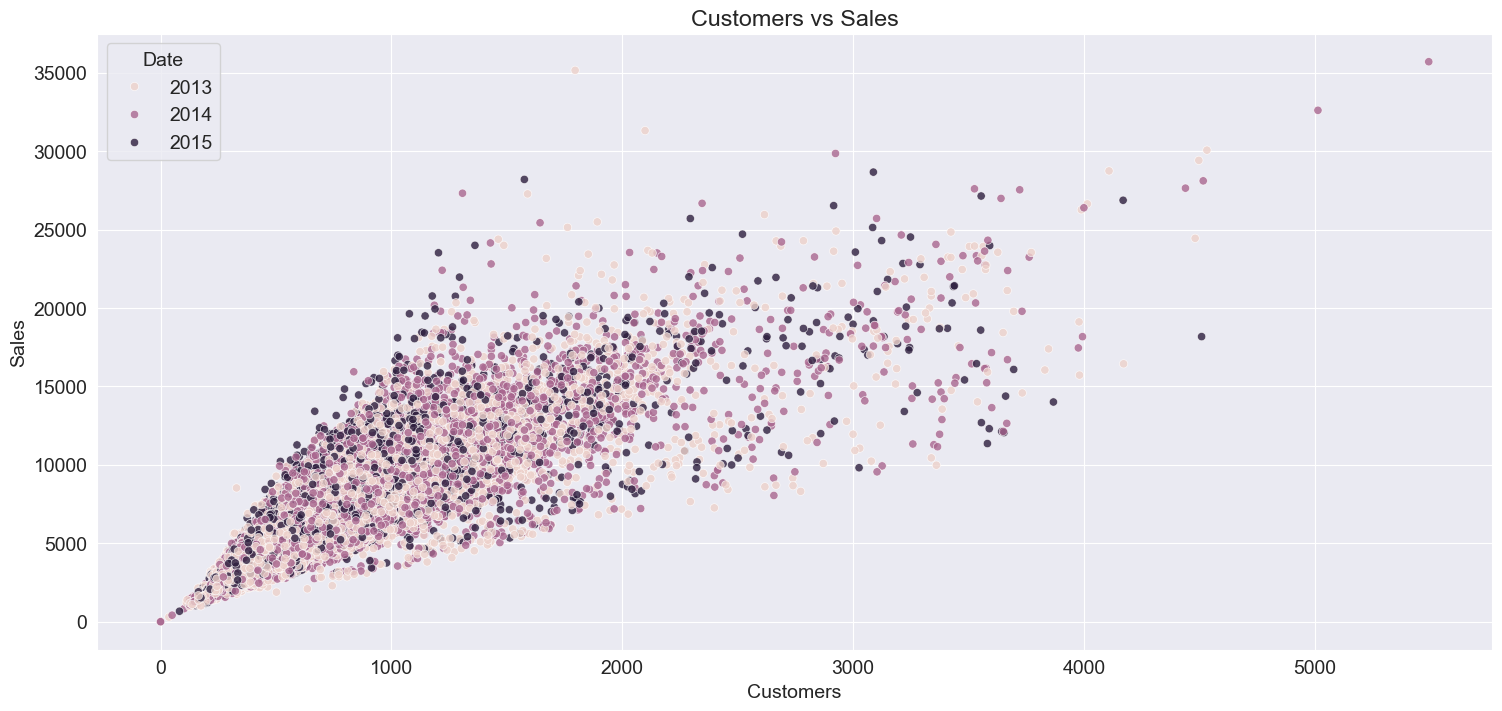

In [28]:
plt.figure(figsize=(18,8))
temp_df=merged_df.sample(40000)
sns.scatterplot(data=temp_df,x='Customers',y='Sales',hue=temp_df.Date.dt.year,alpha=0.8)
plt.title('Customers vs Sales')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

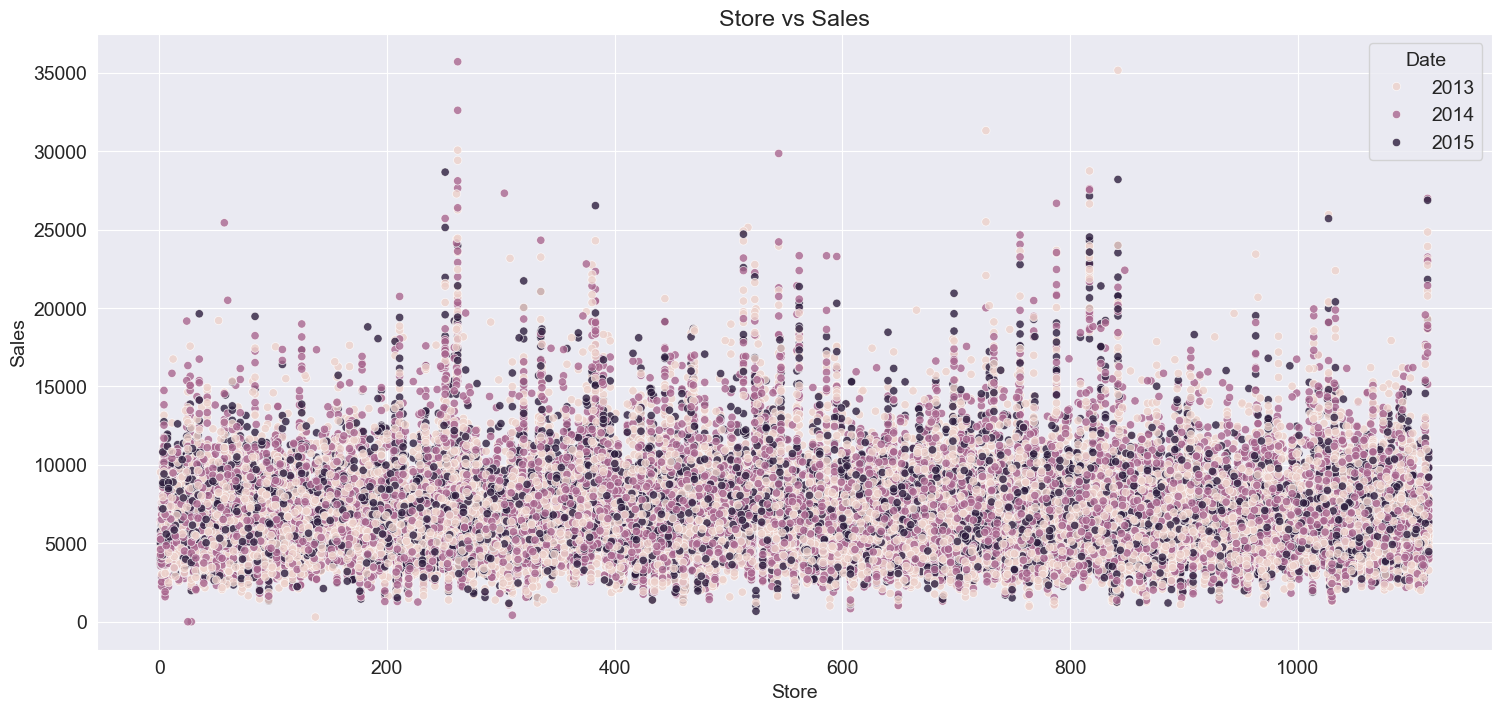

In [29]:
plt.figure(figsize=(18,8))
sns.scatterplot(data=temp_df,x='Store',y='Sales',hue=temp_df.Date.dt.year,alpha=0.8)
plt.title('Store vs Sales')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

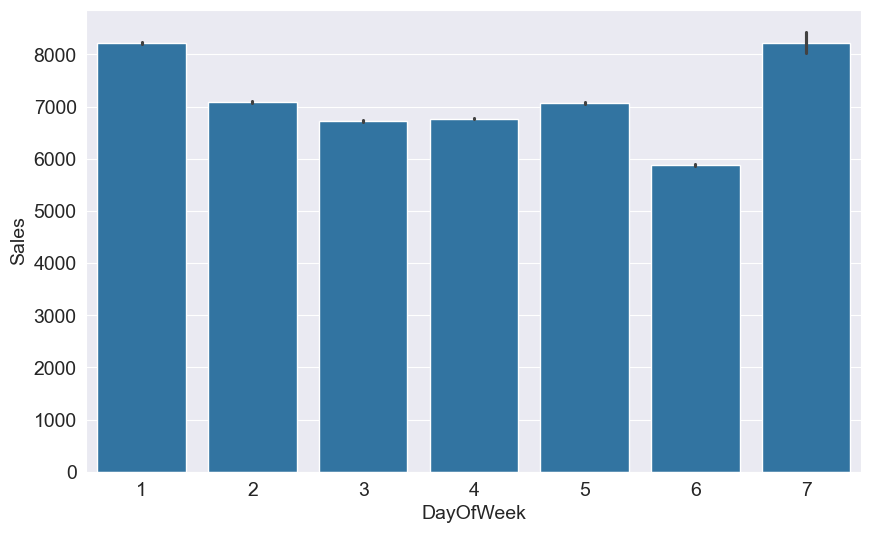

In [30]:
sns.barplot(data=merged_df,x='DayOfWeek',y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

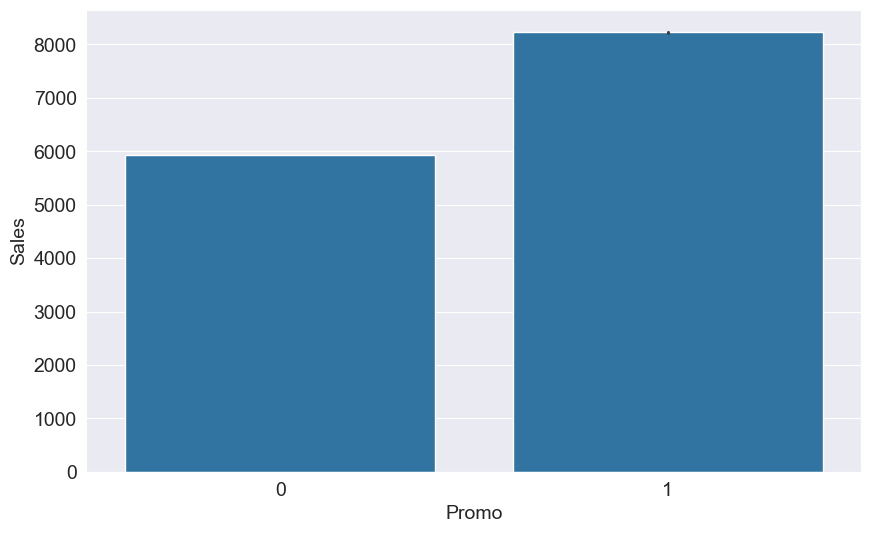

In [31]:
sns.barplot(data=merged_df,x='Promo',y='Sales')

## Feature Engineering

**since we have a date column we can extract day or month or year and create a new feature**

In [32]:
merged_df['Day']=merged_df.Date.dt.day
merged_df['Month']=merged_df.Date.dt.month
merged_df['Year']=merged_df.Date.dt.year
merged_test_df['Day']=merged_df.Date.dt.day
merged_test_df['Month']=merged_df.Date.dt.month
merged_test_df['Year']=merged_df.Date.dt.year


In [33]:
merged_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-31,5263,555,1,1,0,1,31,7,2015
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-30,5020,546,1,1,0,1,30,7,2015
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-29,4782,523,1,1,0,1,29,7,2015
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-28,5011,560,1,1,0,1,28,7,2015
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-27,6102,612,1,1,0,1,27,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-07,6905,471,1,1,0,1,7,1,2013
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-05,4771,339,1,0,0,1,5,1,2013
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-04,4540,326,1,0,0,1,4,1,2013
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-03,4297,300,1,0,0,1,3,1,2013


<Axes: xlabel='Day', ylabel='Sales'>

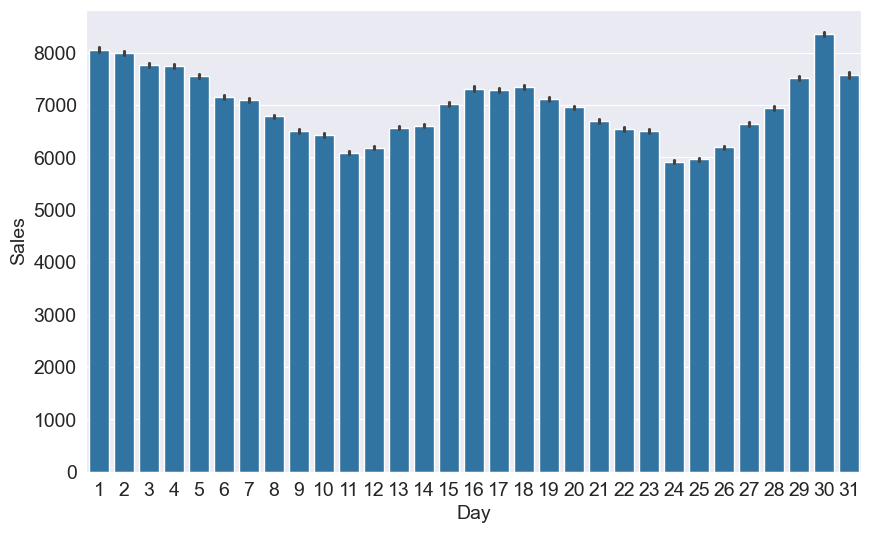

In [35]:
sns.barplot(data=merged_df,x='Day',y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

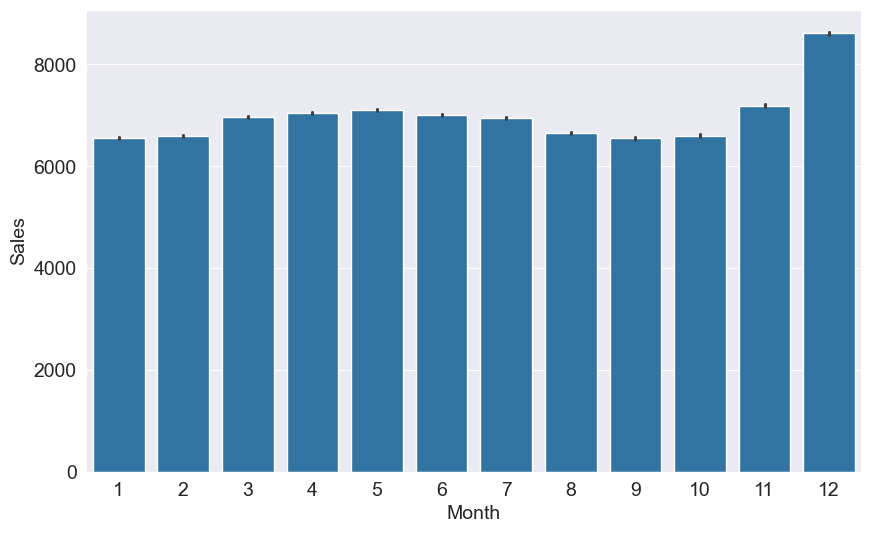

In [36]:
sns.barplot(data=merged_df,x='Month',y='Sales')

<Axes: xlabel='Year', ylabel='Sales'>

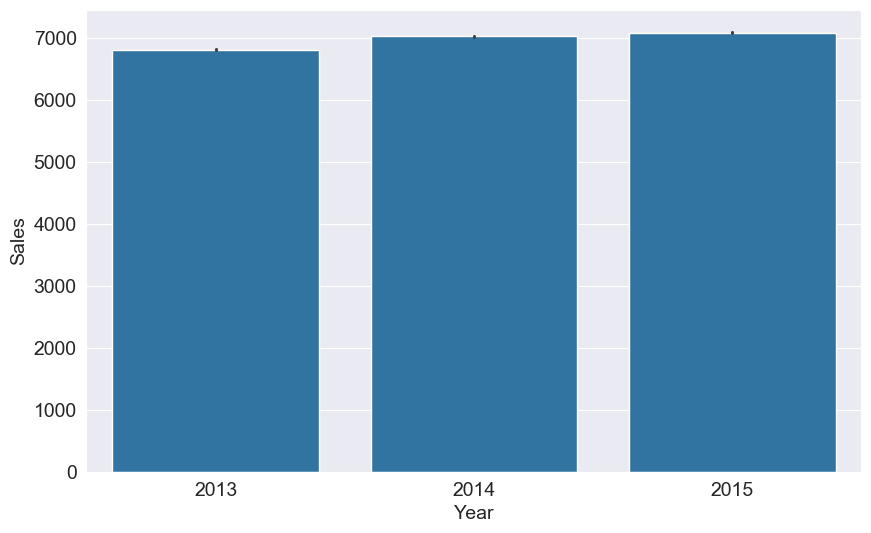

In [37]:
sns.barplot(data=merged_df,x='Year',y='Sales')

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

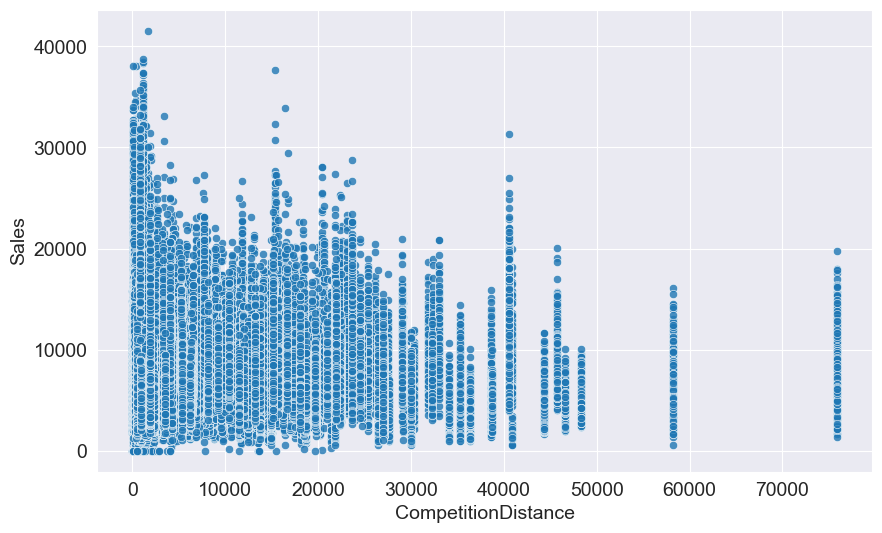

In [38]:
sns.scatterplot(data=merged_df,x='CompetitionDistance',y='Sales',alpha=0.8)

In [34]:
merged_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Day', 'Month', 'Year'],
      dtype='object')

<Axes: xlabel='StateHoliday', ylabel='Sales'>

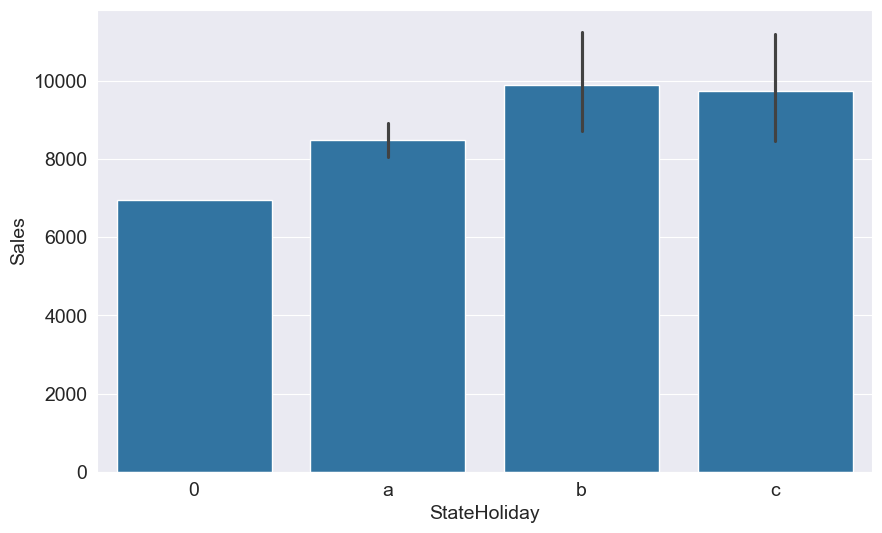

In [40]:
sns.barplot(data=merged_df,x='StateHoliday',y='Sales')

In [41]:
merged_df.StateHoliday.value_counts()

StateHoliday
0    843482
a       694
b       145
c        71
Name: count, dtype: int64

In [35]:
train_size=int(.75*len(merged_df))
train_size

633294

In [36]:
sorted_df=merged_df.sort_values('Date')
train_df,val_df=sorted_df[:train_size],sorted_df[train_size:]

In [37]:
train_df.Date.min(),train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [38]:
val_df.Date.min(),val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [39]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']

In [40]:
target_col = 'Sales'

In [41]:

merged_df[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [42]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = merged_test_df[input_cols].copy()
# Test data does not have targets


In [43]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

## imputation


In [44]:
from sklearn.impute import SimpleImputer

In [45]:
imputer=SimpleImputer(strategy='mean')

In [46]:
imputer.fit(train_inputs[numeric_cols])

SimpleImputer()

In [47]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])


## Scaler

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler=MinMaxScaler().fit(train_inputs[numeric_cols])

In [50]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

## Encoding


In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(train_inputs[categorical_cols])


In [53]:
encoded_categories=encoder.get_feature_names_out(categorical_cols)

In [54]:
encoded_categories=list(encoded_categories)

In [55]:
train_inputs[encoded_categories]=encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_categories]=encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_categories]=encoder.transform(test_inputs[categorical_cols])

In [56]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year,DayOfWeek_1,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
615999,0.605925,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
667669,0.657092,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
512659,0.503591,2,0,a,b,c,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
450995,0.442549,2,0,a,b,a,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
238339,0.234291,2,0,a,b,a,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597187,0.587971,3,0,0,d,a,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
411827,0.404847,3,0,0,a,c,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
906956,0.892280,3,0,0,d,a,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
973514,0.957810,3,0,0,d,c,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [57]:
X_train=train_inputs[numeric_cols+encoded_categories]
X_val=val_inputs[numeric_cols+encoded_categories]
X_test=test_inputs[numeric_cols+encoded_categories]

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [59]:
def try_model(model):
    # Fit the model
    model.fit(X_train, train_targets)

    # Generate predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Compute RMSE
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse

In [90]:
train_rmse,val_rmse=try_model(model=LinearRegression())
print(train_rmse)
print(val_rmse)

2741.6413940538346
2817.2351872425925


C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [61]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor

In [69]:

for model in [Ridge(),Lasso(),ElasticNet(),SGDRegressor()]:
  train_rmse,val_rmse=try_model(model)
  print(train_rmse)
  print(val_rmse)
  print("--"*8)

C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2741.587819331217
2817.777733080905
----------------


C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2741.715013842948
2817.946518924478
----------------


C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2879.0445869995697
2972.659809480395
----------------
2744.3374898039588
2831.737342566548
----------------


C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [62]:
from sklearn.tree import DecisionTreeRegressor


In [71]:
train_rmse,val_rmse=try_model(DecisionTreeRegressor(max_leaf_nodes=150,max_depth=3))
print(train_rmse)
print(val_rmse)
print("-"*8)

2741.748738465345
2841.603978401003
--------


C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [88]:
from sklearn.ensemble import RandomForestRegressor


In [89]:
train_rmse,val_rmse=try_model(RandomForestRegressor(n_jobs=-1))
print(train_rmse)
print(val_rmse)
print("-"*8)

C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


475.43885569348424
1375.525043434547
--------


## Hyperparameter Optimization

In [65]:
model=LinearRegression()

In [64]:

from scipy.stats import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV,KFold

In [88]:

# Create a linear regression model (replace LogisticRegression with your regression model)
model = LinearRegression()

# Define KFold cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Define the search space for hyperparameters
space = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [-1, None],  # -1 means using all processors, None uses 1 processor
    'positive': [True, False]  # Ensures non-negative coefficients if True
}
# Define the RandomizedSearchCV
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, random_state=1)

# Execute the search (X and y should be your features and target for regression)
result = search.fit(X_train,train_targets)

# Summarize results
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=500. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    e

Best Score: -7517467.489630173
Best Hyperparameters: {'positive': False, 'n_jobs': -1, 'fit_intercept': False, 'copy_X': True}


In [66]:
train_rmse,val_rmse=try_model(model=LinearRegression(positive=False,n_jobs= -1,fit_intercept=False,copy_X=True))
print(train_rmse)
print(val_rmse)

2741.6572890729035
2817.4328037791406


C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Diwas neupane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [92]:
model=Ridge()

In [95]:
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [63]:
# cv = KFold(n_splits=10, random_state=1, shuffle=True)

# # Define the search space for hyperparameters
# space = {
#     'alpha': loguniform(1e-5, 100),  # Exploring a range of alpha values
#     'copy_X': [True, False],
#     'fit_intercept': [True, False],
#     'max_iter': [None, 1000, 2000],
#     'positive': [True, False],
#     'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
#     'tol': [1e-4, 1e-3, 1e-2],
#     'random_state': [None, 1, 42]  # You can experiment with different random states
# }
# # Define the RandomizedSearchCV
# search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, random_state=1)

# # Execute the search (X and y should be your features and target for regression)
# result = search.fit(X_train,train_targets)

# # Summarize results
# print('Best Score: %s' % result.best_score_)
# print('Best Hyperparameters: %s' % result.best_params_)